In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [21]:
Data = pd.read_csv('For_K_Groupping.csv', engine = "python")

In [22]:
Data.head()

,title,content
0,Email Phishing,State-Sponsored Phishing Attack Targeted Israe...
1,Email Phishing,‘Callback’ Phishing Campaign Impersonates Secu...
2,Email Phishing,Novel Phishing Trick Uses Weird Links to Bypas...
3,Email Phishing,Exchange Servers Speared in IcedID Phishing Ca...
4,Email Phishing,Phishing Campaign Targeted Those Aiding Ukrain...


In [23]:
docs = Data['content']

In [24]:
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [25]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()) # 뭔가 오류 떠서 get_feature_names 이거 대신에 저거 씀

In [26]:
kmeans = KMeans(n_clusters=4).fit(df)

In [27]:
kmeans.labels_

array([0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 3, 0, 0, 0, 2, 2, 2,
       3, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 3, 1, 1,
       0, 0, 0, 2, 1, 0, 2], dtype=int32)

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents \
                          , columns = ['principal component 1', \
                                      'principal component 2'])

In [30]:
principalDf.index = Data['title']

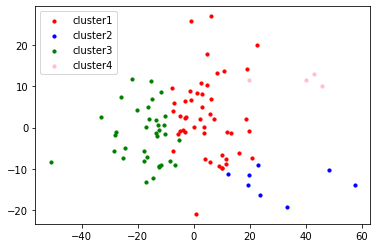

In [31]:
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf. \
           iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', \
           label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf. \
           iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', \
           label = 'cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf. \
           iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', \
           label = 'cluster3')
plt.scatter(principalDf.iloc[kmeans.labels_ == 3, 0], principalDf. \
           iloc[kmeans.labels_ == 3, 1], s = 10, c = 'pink', \
           label = 'cluster4')
# plt.scatter(principalDf.iloc[kmeans.labels_ == 4, 0], principalDf. \
#            iloc[kmeans.labels_ == 4, 1], s = 10, c = 'yellow', \
#            label = 'cluster5')
# plt.scatter(principalDf.iloc[kmeans.labels_ == 5, 0], principalDf. \
#            iloc[kmeans.labels_ == 5, 1], s = 10, c = 'brown', \
#            label = 'cluster6')
# plt.scatter(principalDf.iloc[kmeans.labels_ == 6, 0], principalDf. \
#            iloc[kmeans.labels_ == 6, 1], s = 10, c = 'black', \
#            label = 'cluster7')
# plt.scatter(principalDf.iloc[kmeans.labels_ == 7, 0], principalDf. \
#            iloc[kmeans.labels_ == 7, 1], s = 10, c = 'purple', \
#            label = 'cluster8')
# plt.scatter(principalDf.iloc[kmeans.labels_ == 8, 0], principalDf. \
#            iloc[kmeans.labels_ == 8, 1], s = 10, c = 'red', \
#            label = 'cluster9')
# plt.scatter(principalDf.iloc[kmeans.labels_ == 9, 0], principalDf. \
#            iloc[kmeans.labels_ == 9, 1], s = 10, c = 'green', \
#            label = 'cluster10')
plt.legend()